# FAKE NEWS DETECTION

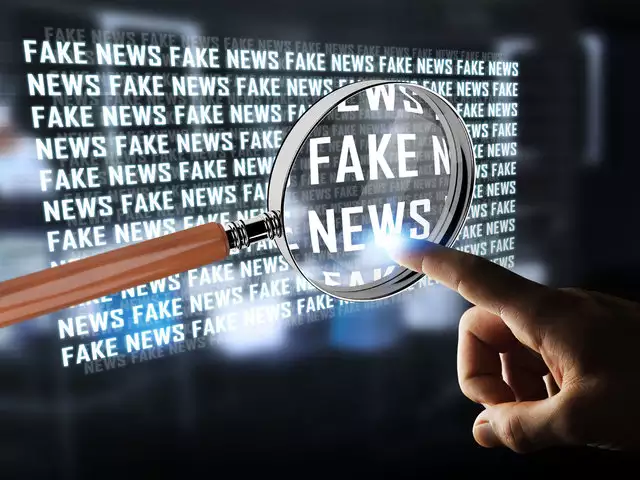

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
%matplotlib inline

In [3]:
# Reading the .csv files

df_fake = pd.read_csv('Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true = pd.read_csv('True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Data Preprocessing

In [5]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<AxesSubplot:>

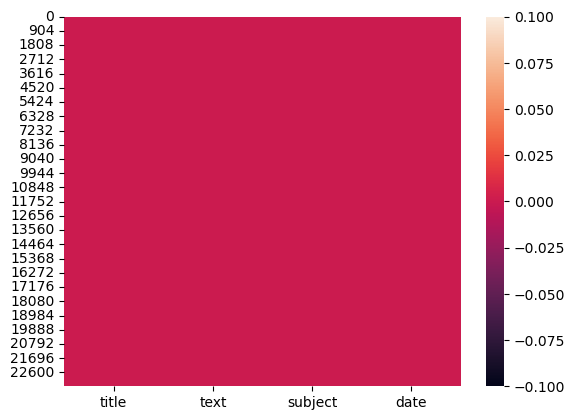

In [6]:
sns.heatmap(df_fake.isnull())

In [7]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [8]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


<AxesSubplot:>

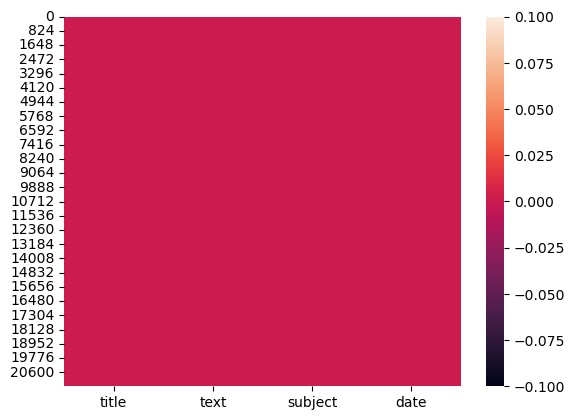

In [9]:
sns.heatmap(df_true.isnull())

In [10]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
df_fake['Result'] = 0
df_true['Result'] = 1

In [12]:
df_fake.head()

,title,text,subject,date,Result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df_true.head()

,title,text,subject,date,Result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
df = pd.concat([df_fake,df_true])

In [16]:
df.head()

,title,text,subject,date,Result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
print(df_fake.shape)
print(df_true.shape)
print(df.shape)

(23481, 5)
(21417, 5)
(44898, 5)


In [18]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Result'], dtype='object')

In [19]:
df = df.drop(['title','subject','date'],axis=1)
df.head()

,text,Result
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [20]:
df = df.sample(frac=1)
df.head()

,text,Result
17667,Alabama Senate candidate Roy Moore is denying ...,0
12410,,0
17206,WASHINGTON (Reuters) - The United States will ...,1
7972,It looks at though Sen. Ted Cruz will actually...,0
21891,"If I were U.S. District Judge Andrew Hanen, I ...",0


In [21]:
df.reset_index(inplace=True)

In [22]:
df.head()

,index,text,Result
0,17667,Alabama Senate candidate Roy Moore is denying ...,0
1,12410,,0
2,17206,WASHINGTON (Reuters) - The United States will ...,1
3,7972,It looks at though Sen. Ted Cruz will actually...,0
4,21891,"If I were U.S. District Judge Andrew Hanen, I ...",0


In [23]:
df.drop(['index'],axis=1,inplace=True)

In [24]:
df.head()

,text,Result
0,Alabama Senate candidate Roy Moore is denying ...,0
1,,0
2,WASHINGTON (Reuters) - The United States will ...,1
3,It looks at though Sen. Ted Cruz will actually...,0
4,"If I were U.S. District Judge Andrew Hanen, I ...",0


Task of NLP Comes Here

Step - 1 : Convert the text in lowercase and remove the extra space, special chr., ulr and links.

In [25]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [26]:
df['text'] = df['text'].apply(wordopt)

In [27]:
df.head()

,text,Result
0,alabama senate candidate roy moore is denying ...,0
1,,0
2,washington reuters the united states will ...,1
3,it looks at though sen ted cruz will actually...,0
4,if i were u s district judge andrew hanen i ...,0


Step - 2: Tokenization

Step - 3: Removal of Stop Words

Step - 4: Stemming and Lemmatization

In [29]:
def nlpSteps(text):
    tokens = nltk.word_tokenize(text)
    stop_words = stopwords.words('english')
    txt_no_stopwords = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for w in txt_no_stopwords:
        lemmatized_words.append(lemmatizer.lemmatize(w))
    text = " ".join(lemmatized_words)
    return text

In [30]:
df['text'] = df['text'].apply(nlpSteps)

In [31]:
df.head()

,text,Result
0,alabama senate candidate roy moore denying rom...,0
1,,0
2,washington reuters united state take lead help...,1
3,look though sen ted cruz actually contend comp...,0
4,u district judge andrew hanen keeping guy clos...,0


Creation of TDIF Vectors

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectors = TfidfVectorizer()
x = vectors.fit_transform(df['text'])

Fitting it into ML Model (Neural Networks - Schocastic Gradient Descent) and Calculating its Accuracy

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.model_selection import cross_val_score
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)
y = df['Result']
#for folds in range(2,16):
#    scores = cross_val_score(sgd,x,df['Result'],cv=folds)
#    print(f'Cross validation score for {folds} folds: {scores.mean():.4f}')
kf = KFold(n_splits=10)
a_scores = []
p_scores = []
r_scores = []
f_scores = []
for train, test in kf.split(x,y):
    x_train = x[train] 
    x_test = x[test]
    y_train = y[train]
    y_test = y[test]
    sgd.fit(x_train,y_train)
    y_pred = sgd.predict(x_test)
    a_scores.append(accuracy_score(y_test,y_pred))
    p_scores.append(precision_score(y_test,y_pred))
    r_scores.append(recall_score(y_test,y_pred))
    f_scores.append(f1_score(y_test,y_pred))
a_scores = np.array(a_scores)
p_scores = np.array(p_scores)
r_scores = np.array(r_scores)
f_scores = np.array(f_scores)
print('Accuracy Score of the model: ',np.mean(a_scores))
print("Precision Score of the model:",np.mean(p_scores))
print("Recall Score of the model:",np.mean(r_scores))
print('F1-Score of the model:',np.mean(f_scores))

Accuracy Score of the model:  0.9901554852470354
Precision Score of the model: 0.9880980857652576
Recall Score of the model: 0.9913180384707374
F1-Score of the model: 0.9897032437148978


Conclusion - Fake news detection model has been made successfully with accuracy of 99.01%